# **Homework 1:** 
STATS348, UChicago, Spring 2024

----------------
**Daniel F. Noriega**

----------------

<a href="https://colab.research.google.com/github/aschein/stat_348_2024/blob/main/assignments/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

## Instructions

The purpose of this homework is to apply the concepts raised in week 1 on supervised learning and decision problems:

* overfitting / underfitting
* CV and model selection
* logistic regression
* KNNs

This homework will also get you familiar with Python and the [scikit-learn](https://scikit-learn.org/stable/) package.

For reference, this homework is a close adaption of [homework 1 from the 2021 version of STAT348](https://dynalist.io/d/ehiGZbaDzYG4q9tJvuCrag3U#z=Hu-cB8VnWnu5IXOgZ-3MaF6C&q=%23homework%20).

Assignment is due **Saturday March 30, 11:59pm** on GradeScope.


## **Problem 1:** Elephants

Read through [Matthew Stephens' vignette on classifying savannah versus forest elephants](https://stephens999.github.io/fiveMinuteStats/likelihood_ratio_simple_models.html) and then do exercises 2a and 2b from the vignette, which are copied here (and relabeled 1a and 1b).

> 1a) Perform the following simulation study. Simulate 1000 tusks (values of $x$) from each of the models $M_S$ and $M_F$. For each simulated tusk compute the LR for $M_S$ vs $M_F$, so you have computed 2000 LRs. Now consider using the LR to classify each tusk as being from a savanna or a forest elephant. Recall that large values for LR indicate support for $M_S$, so a natural classification rule is “classify as savanna if $\textrm{LR} > c$, otherwise classify as forest” for some threshold $c$. Plot the misclassification rate (= number of tusks wrongly classified/2000) for this rule, as $c$ ranges from 0.01 to 100. What value of $c$ minimizes the misclassification rate? [Hint: the plot will look best if you do things on the log scale, so you could let $\log_{10}(c)$ vary from -2 to 2 using an equally spaced grid, and plot the misclassification rate on the $y$-axis against $\log_{10}(c)$ on the $x$-axis.]


> 1b) Repeat the above simulation study using 100 tusks from MS and 1900 tusks from MF. What value of $c$ minimizes the misclassification rate? Comment.

To complete this problem in Python, here are some useful tools:
- To plot you can use [matplotlib](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/). You can see the week 1 notebook for examples.

- To sample random variables you can use [numpy.random](https://numpy.org/doc/stable/reference/random/index.html)

In [1]:
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt
import seaborn as sns


# sample a Bernoulli with probability p
p = 0.5
x = rn.binomial(1, p)

# sample n Bernoullis iid with probability p
n = 100
x = rn.binomial(1, p, size=n)

# sample n Bernoullis independently with different probabilities
p = np.array([0.1, 0.4, 0.5, 0.1, 0.9])
x = rn.binomial(1, p)

# this last example uses broadcasting.
# See here: https://numpy.org/doc/stable/user/basics.broadcasting.html

To complete the first part of this problem, you should complete the following functions.

In [2]:
def simulate_tusks_forest(size=1000):
    """Samples from the likelihood of P(x | forest).
    
    Parameters
    ----------
    size : int
        The number of samples to draw.
    """
    p = np.array([0.8, 0.2, 0.11, 0.17, 0.23, 0.25])
    res = rn.binomial(1, p, size=(size,len(p)))
    return res
        

def simulate_tusks_savannah(size=1000):
    """Samples from the likelihood of P(x | savannah).
    
    Parameters
    ----------
    size : int
        The number of samples to draw.
    """
    p = np.array([0.4, 0.12, 0.21, 0.12, 0.02, 0.32])
    res = rn.binomial(1, p, size=(size,len(p)))
    return res


def likelihood_forest(x):
    """Computes the likelihood of the data under the M_F model (i.e., given that the elephant is forest elephant)."""
    p = np.array([0.8, 0.2, 0.11, 0.17, 0.23, 0.25])
    return np.prod((p**x) * ((1-p)**(1-x)))

def likelihood_savannah(x):
    """Computes the likelihood of the data under the M_S model (i.e., given that the elephant is a savannah elephant)."""
    p = np.array([0.4, 0.12, 0.21, 0.12, 0.02, 0.32])
    return np.prod((p**x) * ((1-p)**(1-x)))

- **1a)**: Use the functions above to perform the simulations and generate the plots in 1a.

    Use code block below for this. The output should display the plot(s), and show which $c$ minimizes the misclassification rate.

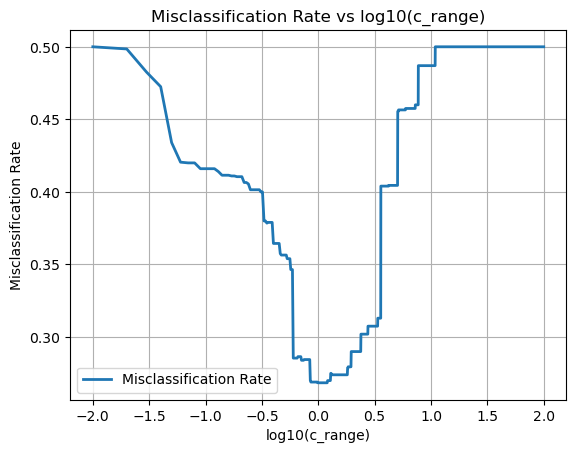

The c that minimizes the misclassification rate is: 0.99 with a misclassification rate of: 26.85 %


In [3]:
n_Savannah=1000
n_Forest=1000

SimulatedData=np.concatenate((simulate_tusks_savannah(n_Savannah), simulate_tusks_forest(n_Forest)))
true_labels=np.concatenate((np.ones(n_Savannah), np.zeros(n_Forest)))
LRatios=[likelihood_savannah(i)/likelihood_forest(i) for i in SimulatedData]
c_range=np.linspace(0.01, 100, 10000)
missclassification_rate=1-([LRatios>c for c in c_range]==true_labels).mean(axis=1)

#Plotting
sns.lineplot(x=np.log10(c_range), y=missclassification_rate, linewidth=2)

# Set the labels and title
plt.xlabel('log10(c_range)')
plt.ylabel('Misclassification Rate')
plt.title('Misclassification Rate vs log10(c_range)')

# Add legend
plt.legend(['Misclassification Rate'])
plt.grid(True)

# Show the plot
plt.show()

print('The c that minimizes the misclassification rate is:', round(c_range[np.argmin(missclassification_rate)],2), 
      'with a misclassification rate of:', round(np.min(missclassification_rate)*100,2), '%' )

- **1b)** Now do the same for 1b.

    Use code block below for this. The output should display the plot(s), and show which $c$ minimizes the misclassification rate.

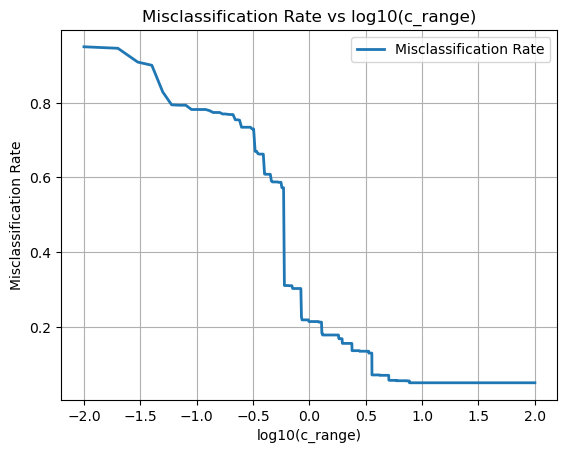

The c that minimizes the misclassification rate is: 7.71 with a misclassification rate of: 5.0 %


In [4]:
n_Savannah=100
n_Forest=1900

SimulatedData=np.concatenate((simulate_tusks_savannah(n_Savannah), simulate_tusks_forest(n_Forest)))
true_labels=np.concatenate((np.ones(n_Savannah), np.zeros(n_Forest)))
LRatios=[likelihood_savannah(i)/likelihood_forest(i) for i in SimulatedData]
c_range=np.linspace(0.01, 100, 10000)
missclassification_rate=1-([LRatios>c for c in c_range]==true_labels).mean(axis=1)

#Plotting
sns.lineplot(x=np.log10(c_range), y=missclassification_rate, linewidth=2)

# Set the labels and title
plt.xlabel('log10(c_range)')
plt.ylabel('Misclassification Rate')
plt.title('Misclassification Rate vs log10(c_range)')

# Add legend
plt.legend(['Misclassification Rate'])
plt.grid(True)

# Show the plot
plt.show()

print('The c that minimizes the misclassification rate is:', round(c_range[np.argmin(missclassification_rate)],2), 
      'with a misclassification rate of:', round(np.min(missclassification_rate)*100,2), '%' )

## **Problem 2:** Digits

Consider the [zipcode data from _Elements of Statistical Learning_ (ESL)](https://hastie.su.domains/ElemStatLearn/data.html). Note there is both a train and test set.

- **2a)** Download the data and try plotting a few examples of the training data as 16 x 16 images to see if you can see the digits visually as expected. [Hint: Use matplotlib's [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) function.] 

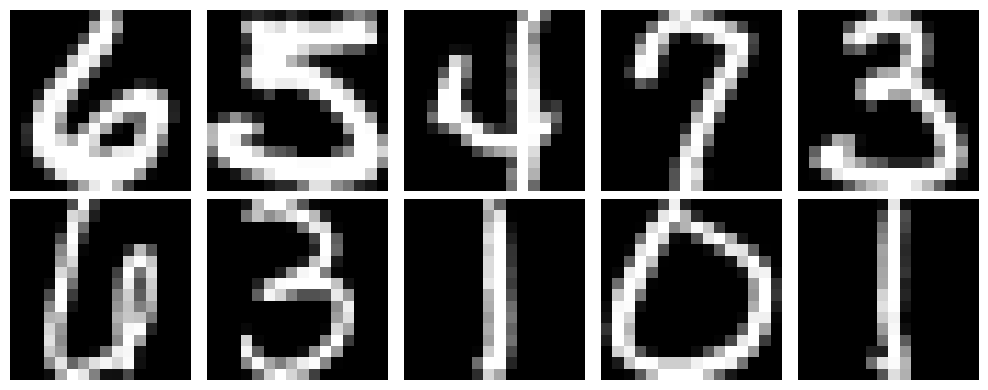

[6. 5. 4. 7. 3.]
[6. 3. 1. 0. 1.]


In [5]:
import gzip

training_raw = np.loadtxt(gzip.open('../data/hw1/zip.train.gz'))
testing_raw = np.loadtxt(gzip.open('../data/hw1/zip.test.gz'))
training_labels, training_data = training_raw[:,0], training_raw[:,1:]
testing_labels, testing_data = testing_raw[:,0], testing_raw[:,1:]

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.ravel()

for i in range(10):
    image = training_data[i].reshape(16, 16)
    axes[i].imshow(image, cmap='gray')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

print(training_labels[:5])
print(training_labels[5:10])

- **2b)** Consider the problem of trying to distinguish the digit 2 from the digit 3. Use the training data to learn classifiers, using:
    - logistic regression (un-regularized)
    - K nearest neighbors (K-NNs), with $K=1,3,5,7,15$.
    
    This gives 6 classifiers in total.

    To complete this in Python you will want to use [scikit-learn](https://scikit-learn.org/stable/), and refer to the week 1 notebook for examples.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Filter data for labels 2 and 3
training_data_2_3 = training_data[np.where((training_labels == 2) | (training_labels == 3))]
training_labels_2_3 = training_labels[np.where((training_labels == 2) | (training_labels == 3))]
testing_data_2_3 = testing_data[np.where((testing_labels == 2) | (testing_labels == 3))]
testing_labels_2_3 = testing_labels[np.where((testing_labels == 2) | (testing_labels == 3))]

# Convert labels: 2 to 1 (positive class), and 3 to 0 (negative class)
training_labels_2_3 = np.where(training_labels_2_3 == 2, 1, 0)
testing_labels_2_3 = np.where(testing_labels_2_3 == 2, 1, 0)

# Dictionary to store models
models = {}

# Add Logistic Regression Model
models['logreg'] = LogisticRegression(fit_intercept=True, max_iter=10000, penalty=None)
models['logreg'].fit(training_data_2_3, training_labels_2_3)

# KNN models with varying numbers of neighbors
neighbor_settings = [1, 3, 5, 7, 9, 15]
for n_neighbors in neighbor_settings:
    key = f'knn_{n_neighbors}'
    models[key] = KNeighborsClassifier(n_neighbors=n_neighbors)
    models[key].fit(training_data_2_3, training_labels_2_3)


- **2c)** Apply these classifiers to the test data, and plot the misclassification rates for both training data and test data. (Plot the results for K-NN with $K$ on x-axis, and misclassification rate on y-axis, with two different colors for test and training sets. Then put appropriately colored horizontal lines on the same plot---one for test and one for train---indicating the results for logistic regression.)

    Your code in the cell below should output this plot.

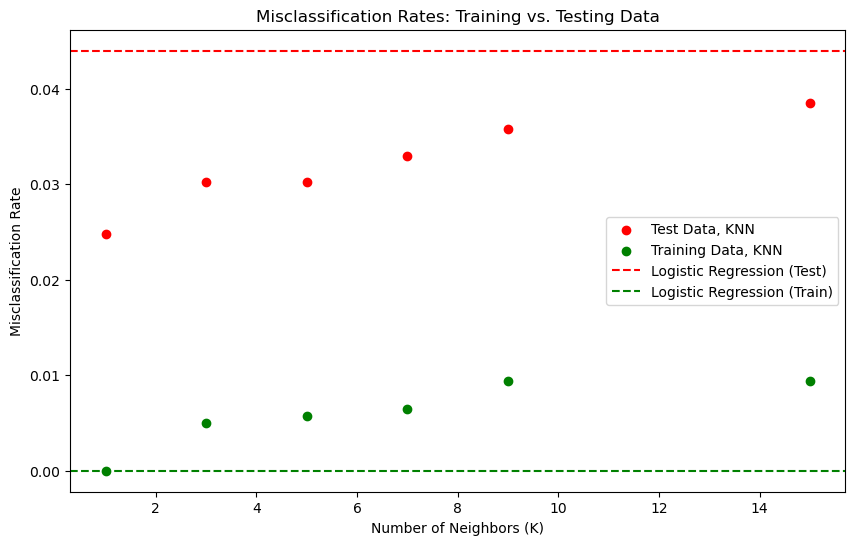

In [7]:
# Initialize dictionaries for storing predictions and misclassification rates
predictions_train, predictions_test = {}, {}
misclassification_rates_train, misclassification_rates_test = {}, {}

# Iterate through the models to generate predictions and calculate misclassification rates
for key, model in models.items():
    # Generate predictions for training and testing data
    predictions_train[key] = model.predict(training_data_2_3)
    predictions_test[key] = model.predict(testing_data_2_3)
    
    # Calculate misclassification rates
    misclassification_rates_train[key] = 1 - np.mean(predictions_train[key] == training_labels_2_3)
    misclassification_rates_test[key] = 1 - np.mean(predictions_test[key] == testing_labels_2_3)

# Extract KNN keys for plotting
knn_keys = [f'knn_{n}' for n in neighbor_settings]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(neighbor_settings, [misclassification_rates_test[k] for k in knn_keys], label='Test Data, KNN', color ='r')
plt.scatter(neighbor_settings, [misclassification_rates_train[k] for k in knn_keys], label='Training Data, KNN', color ='g')
plt.axhline(y=misclassification_rates_test['logreg'], color='r', linestyle='--', label='Logistic Regression (Test)')
plt.axhline(y=misclassification_rates_train['logreg'], color='g', linestyle='--', label='Logistic Regression (Train)')

# Labels and Legend
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Misclassification Rate')
plt.legend()
plt.title('Misclassification Rates: Training vs. Testing Data')
plt.show()


- **2d)** Repeat the K-NN training as above, but using cross validation (CV) *on the training set* to tune $K$. That is, act like you do not have access to the test data and have to decide what $K$ to use.  How does it do?

    Again, for this problem you will want to use [scikit-learn's methods for cross validation](https://scikit-learn.org/stable/modules/cross_validation.html). 

    Please add code in the cell below, and comment on the results in the space below.

----

Your text answer here: 

----

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the range of K values to test
k_range = list(range(1, 16))

# Set up the parameter grid to search
param_grid = dict(n_neighbors=k_range)

# Configure the cross-validation procedure
cv_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')

# Fit the model on the training data
cv_knn.fit(training_data_2_3, training_labels_2_3)

# The best K value from cross-validation
best_k = cv_knn.best_params_['n_neighbors']
best_score = cv_knn.best_score_

print(f"Best K: {best_k} with cross-validation score (accuracy): {round(best_score*100,2)}%")

Best K: 5 with cross-validation score (accuracy): 99.14%


- **2e)** Suppose now that for some reason it is considered worse to misclassify a 2 as a 3 than vice versa. Specifically, suppose you lose 5 points every time you misclassify a 2 as a 3, but 1 point every time you misclassify a 3 as a 2. Modify your logistic regression classifier to take account of this new loss function. Compute the new loss on the test set for both the modified classifier and the original logistic classifier. 

Please add code in the cell below, and provide a brief description / justification of your code in the space below.

----

Your text answer here: 

----

In [9]:
from sklearn.metrics import confusion_matrix

# hard-code losses and calculate threshold; recall 2 is positive.
# 5 points for false negative, 1 point for false positive
loss_TN = 0; loss_FP = 1
loss_FN = 5; loss_TP = 0

thresh = (loss_FP - loss_TN) / (loss_FP - loss_TN + loss_FN - loss_TP)

y_proba = models['logreg'].predict_proba(testing_data_2_3)[:,1]

y_pred_mod_thresh = np.where(y_proba > thresh, 1, 0)
y_pred_original = np.where(y_proba > 0.5, 1, 0)

cm_mod_thresh = confusion_matrix(testing_labels_2_3, y_pred_mod_thresh)
cm_original = confusion_matrix(testing_labels_2_3, y_pred_original)

test_pred_loss_mod_thresh = (cm_mod_thresh * np.array([[loss_TN, loss_FP],[loss_FN, loss_TP]])).sum()
test_pred_loss_original = (cm_original * np.array([[loss_TN, loss_FP],[loss_FN, loss_TP]])).sum()

print(f"Loss for modified threshold ({round(thresh,2)}): {test_pred_loss_mod_thresh}")
print(f"Loss for original threshold (0.5): {test_pred_loss_original}")

Loss for modified threshold (0.17): 43
Loss for original threshold (0.5): 52


- **2f)** As far as you can, repeat this for the K-NN classifiers (i.e. modify them for the new loss function and compare the loss for modified vs original classifiers). Discuss any challenges you face here. 

Please add code in the cell below, and provide a discussion of any challenges in the space below.

----

Your text answer here: 

----

In [10]:
def calculate_loss_with_threshold(model, X, y_true, threshold, loss_matrix):
    # Use predict_proba to get the probabilities for the positive class
    y_proba = model.predict_proba(X)[:, 1]
    # Apply the custom threshold to determine class predictions
    y_pred = np.where(y_proba > threshold, 1, 0)
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Calculate and return loss
    return (cm * loss_matrix).sum()

# Define the loss matrix
loss_matrix = np.array([[loss_TN, loss_FP], [loss_FN, loss_TP]])

# Calculate loss for each K-NN model using the custom threshold
losses_modified_threshold = {}
losses_original = {}
for key, model in models.items():
    if 'knn' in key:  # Ensure we're only working with K-NN models
        losses_modified_threshold[key] = calculate_loss_with_threshold(model, testing_data_2_3, testing_labels_2_3, thresh, loss_matrix)
        # Calculate loss for original classifier (i.e., using the default K=0.5 equivalent for K-NN)
        y_pred_original = model.predict(testing_data_2_3)
        cm_original = confusion_matrix(testing_labels_2_3, y_pred_original)
        losses_original[key] = (cm_original * loss_matrix).sum()

# Output losses for comparison
for key in losses_modified_threshold.keys():
    print(f"{key} - Loss with modified threshold: {losses_modified_threshold[key]}, Loss with original classifier: {losses_original[key]}")

knn_1 - Loss with modified threshold: 33, Loss with original classifier: 33
knn_3 - Loss with modified threshold: 26, Loss with original classifier: 39
knn_5 - Loss with modified threshold: 22, Loss with original classifier: 39
knn_7 - Loss with modified threshold: 30, Loss with original classifier: 48
knn_9 - Loss with modified threshold: 31, Loss with original classifier: 53
knn_15 - Loss with modified threshold: 26, Loss with original classifier: 58


## **Problem 3:** Multiclass digits

Continuing with the zipcode data, now consider distinguishing the digits 1, 2, and 3. 

- For this problem, you will be generalizing the things we discussed in class about binary classification to **multiclass classification**, using multinomial logistic regression.

- Read Section 4.3.5 of [_An Introduction to Statistical Learning with Applications in Python_](https://www.statlearning.com/) on multinomial logistic regression for background.

- You can create a multinomial logistic regression model using scikit-learn as follows:

In [11]:
from sklearn.linear_model import LogisticRegression
# an (unregularized) multinomial logistic regression model
logreg = LogisticRegression(penalty=None, solver='liblinear', multi_class='multinomial')

- **3a)** Fit a multinomial logistic regression model to the training data of 1s, 2s, and 3s. Then apply it to the test set, and then calculate and plot the **confusion matrix**.

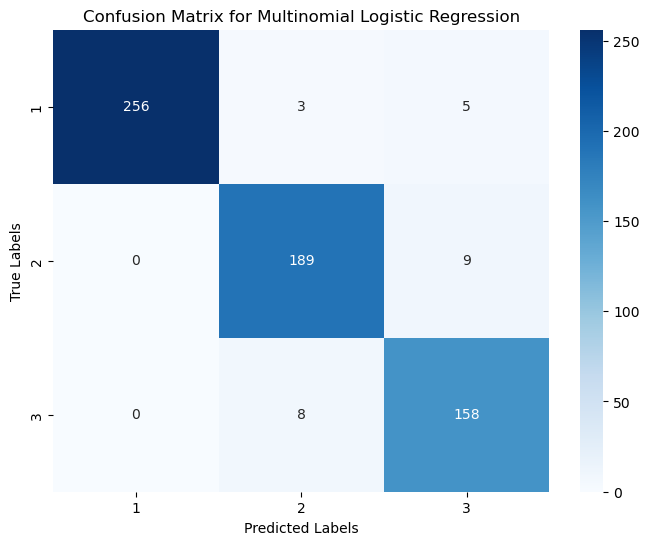

In [12]:
# Filter data for digits 1, 2, and 3
train_filter = np.isin(training_labels, [1, 2, 3])
test_filter = np.isin(testing_labels, [1, 2, 3])

training_data_123 = training_data[train_filter]
training_labels_123 = training_labels[train_filter]
testing_data_123 = testing_data[test_filter]
testing_labels_123 = testing_labels[test_filter]

# Fit a multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000, penalty=None)
model.fit(training_data_123, training_labels_123)

# Apply the model to the test set
predictions = model.predict(testing_data_123)

# Calculate the confusion matrix
cm = confusion_matrix(testing_labels_123, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title('Confusion Matrix for Multinomial Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


- **3b)** Suppose now that for some reason it is considered twice as bad to misclassify a 1 as a 2 than to make any other misclassification. Modify your multinomiallogistic regression classifier to take account of this new loss function. Compute the new loss on the test set for both the modified classifier and the original logistic classifier. 

Please add code in the cell below, and provide justification of your code in the space below, including any derivations you had to do.

----

Minimizing the integrated risk of a decision given by: 

$$r\Big(\widehat{Y}(\cdot)\Big) = \mathbb{E}_{X,Y}\left[\ell\Big(Y, \widehat{Y}(X)\Big)\right]$$

Through Bayes risk:

$$\widehat{Y}^*(x) =\underset{a}{\textrm{argmin}} \, \mathbb{E}_{Y \mid X=x}[\ell(a, Y)]$$

We can define the risk in this for each decision as the following. Recall that we want to make misclassifying a 1 as a 2 twice as bad as any other misclassification.

\begin{aligned}
R_1(X)=\mathbb{E}_{X, Y}[\ell(Y, \hat{Y}(X)]] & =\operatorname{Pr}(Y=1 \mid X=x) \cdot \ell_{T, 1}+\operatorname{Pr}(Y=2 \mid X=x) \cdot \ell_{F, 2}+\operatorname{Pr}(Y=3 \mid X=x) \cdot \ell_{F, 3}
\\
& =\operatorname{Pr}(Y=1 \mid X=x) \cdot 0+\operatorname{Pr}(Y=2 \mid X=x) \cdot 2+\operatorname{Pr}(Y=3 \mid X=x) \cdot 1
\\
& =\operatorname{Pr}(Y=2 \mid X=x) \cdot 2+\operatorname{Pr}(Y=3 \mid X=x) \cdot 1
\end{aligned} 

And

\begin{aligned}
R_2(X) & =\operatorname{Pr}(Y=1 \mid X=x) \cdot 1+\operatorname{Pr}(Y=3 \mid X=x) \cdot 1
\end{aligned}

\begin{aligned}
R_3(X) & =\operatorname{Pr}(Y=1 \mid X=x) \cdot 1+\operatorname{Pr}(Y=2 \mid X=x) \cdot 1
\end{aligned}


We will select the action that minimizes the conditional expected loss for any value of X = x

----

In [13]:
#Loss factors and matrix
loss_=1
loss_12=2
loss_matrix_mod_123 = np.array([[0, loss_12, loss_], [loss_, 0, loss_], [loss_, loss_, 0]])


# Predict class probabilities for the test set
y_proba = model.predict_proba(testing_data_123)

# Initialize an array to hold the predictions based on minimizing expected loss
predictions_min_loss = np.zeros(testing_data_123.shape[0])

# Calculate expected losses for deciding each class and choose the action with the minimum expected loss
for i in range(y_proba.shape[0]):
    # Expected loss for deciding class 1
    R_1 = y_proba[i, 1] * loss_12 + y_proba[i, 2] * loss_
    # Expected loss for deciding class 2
    R_2 = y_proba[i, 0] * loss_ + y_proba[i, 2] * loss_
    # Expected loss for deciding class 3
    R_3 = y_proba[i, 0] * loss_ + y_proba[i, 1] * loss_
    
    # Minimize the expected loss
    R_min = np.argmin([R_1, R_2, R_3])
    
    # Adjust prediction based on the action that minimizes the expected loss
    predictions_min_loss[i] = R_min + 1  # Adding 1 because classes are 1, 2, 3 not 0, 1, 2

# Compare the predictions based on minimizing expected loss with the original predictions
original_predictions = model.predict(testing_data_123)

# Calculate the confusion matrix for the original model and the adjusted model
cm_original = confusion_matrix(testing_labels_123, original_predictions)
cm_adjusted = confusion_matrix(testing_labels_123, predictions_min_loss)

# Output confusion matrices
print("Confusion Matrix - Original Model:")
print(cm_original)
print("\nConfusion Matrix - Adjusted Model:")
print(cm_adjusted)

# Calculate the loss for the original and adjusted models
loss_original = (cm_original * loss_matrix_mod_123).sum()
loss_adjusted = (cm_adjusted * loss_matrix_mod_123).sum()
print(f"\nLoss - Original Model: {loss_original}")
print(f"Loss - Adjusted Model: {loss_adjusted}")

Confusion Matrix - Original Model:
[[256   3   5]
 [  0 189   9]
 [  0   8 158]]

Confusion Matrix - Adjusted Model:
[[256   3   5]
 [  0 189   9]
 [  0   8 158]]

Loss - Original Model: 28
Loss - Adjusted Model: 28


- **3c)** Now consider adding $\ell_2$ regularization to your multinomial logistic regression classifier and answer the question: does it improve performance? Devise some experiments to answer this question convincingly. Use the code block below to implement and run those experiments, and to generate plot(s) that convey the results. Use the space below to briefly describe and justify your experiments, to summarize the results, and to speculate on why regularization does or does not help in this setting.

----

Your text answer here: 

----

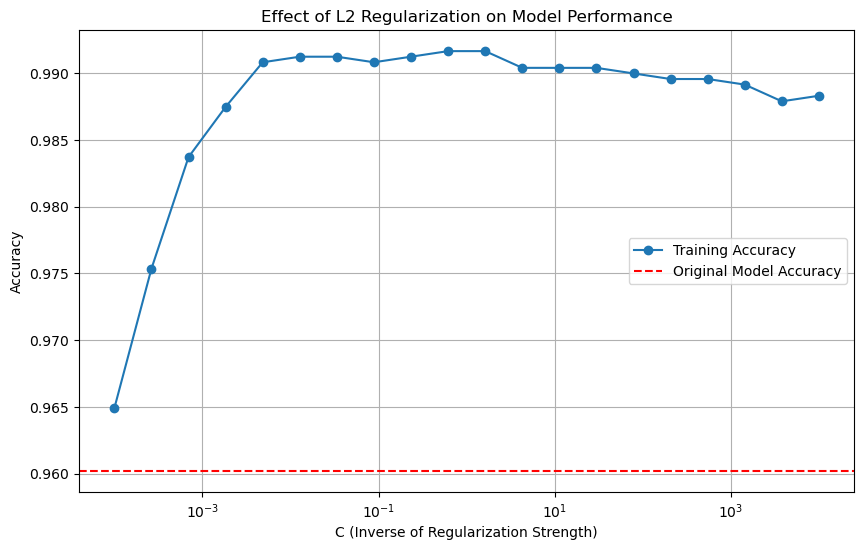

In [14]:
from sklearn.model_selection import cross_val_score

# Calculate the accuracy of the original model
accuracy_original = np.mean(original_predictions == testing_labels_123)

# Define a range of C values to explore
C_values = np.logspace(-4, 4, 20)

# Prepare lists to store results
train_scores = []

# Loop over the values of C to train models and record performance
for C in C_values:
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=C, max_iter=10000, penalty='l2')
    scores = cross_val_score(model, training_data_123, training_labels_123, cv=5, scoring='accuracy')
    train_scores.append(np.mean(scores))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_scores, label='Training Accuracy', marker='o')
plt.axhline(y=accuracy_original, color='r', linestyle='--', label='Original Model Accuracy')
plt.xscale('log')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Effect of L2 Regularization on Model Performance')
plt.legend()
plt.grid(True)
plt.show()